In [1]:
import scipy as sp
import scipy.sparse
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix

# Poisson Equation
This notebook solves the Poisson equation
$$ \frac{\partial^2 u }{\partial x^2} = f(x) \\
a \le x \le b \\
f(a) = \alpha \; \mathrm{and} \; f(b) = \beta
$$
by solving the matrix equation 
$$
A \vec{u} = \vec{b}
$$
where
$$
A = \frac{1}{h^2} \left(\begin{array}{c}-2 & 1 & ...& & \\ 1 & -2 & 1 & &\\ & 1 & & & \\ .& & & & \\ .& & & & 1 \\ & & & 1 & -2   \end{array}\right)
$$
is the finite difference approxiation of the second derivative operator, and
$$
\vec{b} = \left(\begin{array}{c} f(a+h) - \alpha/h^2 \\ f(a+2h) \\ f(a+3h) \\ . \\ . \\ . \\ f(a+Nh) - \beta/h^2 \end{array}\right)
$$
In the following code,
$$
f(x) = e^{-100x^2}
$$
representing an almost point-mass centred at $x=0$. $u$ will then represent the gravitational potential, given than $\alpha = \beta$ to preserve the symmetry.

Text(0,0.5,'u')

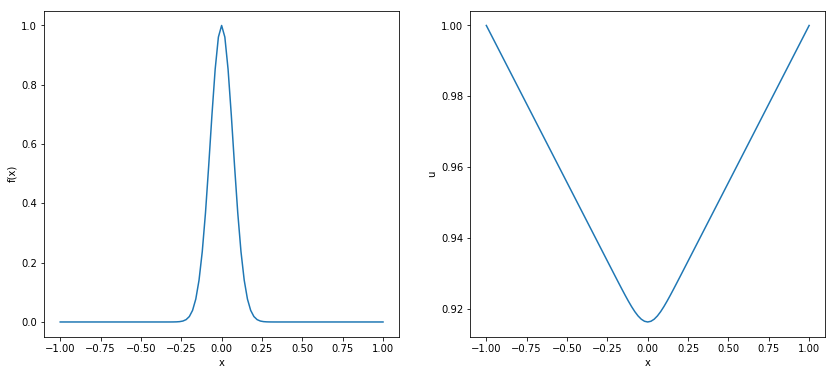

In [36]:
f = lambda x: np.exp(-100*x*x)
a = -1.
b = 1.
L = b-a
N = 99
alpha = 1.0
beta = 1.0

h=L/(N+1)
# csc_matrix is a sparse matrix data structure that Python claims is more efficient to be used with spsolve.
A = csc_matrix(sp.sparse.spdiags(np.array([np.ones(N)*-2., np.ones(N), np.ones(N)]), [0,-1,1], N,N)) / h**2

x = np.arange(a,a+L+h,h)
b = f(x[1:-1])
b[0] -= alpha/h**2  # During the lecture, I forgot to divide alpha and beta by h**2
b[-1] -= beta/h**2  # I think I also used + instead of -.
u = np.zeros(N+2)
u[1:N+1] = spsolve(A,b)
u[0] = alpha
u[-1] = beta
fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].plot(x,f(x))
ax[0].set_xlabel('x')
ax[0].set_ylabel('f(x)')
ax[1].plot(x,u)
ax[1].set_xlabel('x')
ax[1].set_ylabel('u')